## HT8 - Proyecto 2. Entrega 6
### SVM
Diego Duarte 22075 - José Marchena 22398

In [168]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import svm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

In [169]:
house_prices = svm.drop_many_nulls(house_prices)
house_prices = svm.trans_categorical(house_prices)

In [170]:
house_prices.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,70.049958,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,2.39589,1.396575,2.514384,2.842466,2.310274,2.815068,4.741781,1057.429452,1.036301,4.145205,0.934932,3.682877,1162.626712,1515.463699,0.425342,1.565068,0.382877,2.866438,2.511644,6.517808,5.749315,0.613014,2.485616,1978.506164,1.715753,1.767123,472.980137,3.927397,3.960959,1.856164,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,24.284752,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.57428,0.722394,0.784837,0.676527,1.165663,1.874410,0.946713,438.705324,0.295124,0.959501,0.246731,1.051834,386.587738,525.480383,0.518911,0.550916,0.502885,0.815778,0.663760,1.625393,0.979659,0.644666,1.933206,24.689725,0.892831,0.747315,213.804841,0.647822,0.566832,0.496592,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,59.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,5.000000,1954.000000,1967.000000,1.000000,1.000000,8.000000,8.000000,2.00000,1.000000,2.000000,3.000000,2.000000,1.000000,5.000000,795.750000,1.000000,3.000000,1.000000,4.000000,882.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,2.000000,5.000000,6.000000,0.000000,1.000000,1961.000000,1.000000,1.000000,334.500000,4.000000,4.000000,2.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,12.000000,2.000000,2.000000,0.000000,2.000000,6.000000,5.000000,1973.000000,1994.000000,1.000000,1.000000,12.000000,13.000000,2.00000,1.000000,3.000000,3.000000,3.000000,2.000000,5.000000,991.500000,1.000000,5.000000,1.000000,4.000000,1087.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,2.000000,6.000000,6.000000,1.000000,1.000000,1980.000000,2.000000,2.00

c:\Users\JM\Documents\Data Mining\SVM\svm.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


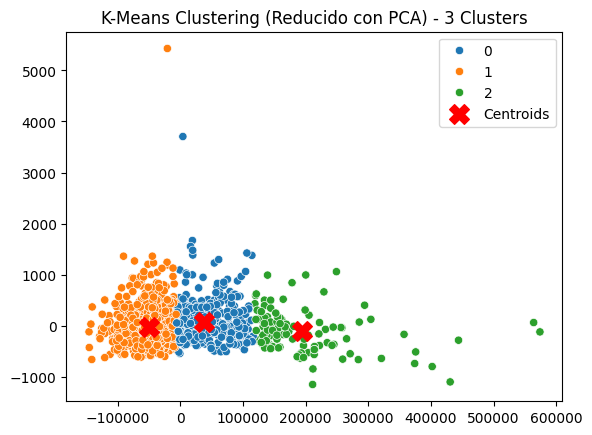

In [171]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict


cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_set = svm.breif_clustering(cluster_set, 3)

In [172]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    518
1    826
2    116
dtype: int64

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses = scaler.fit_transform(house_prices)

# Añadir la columna de clusters al DataFrame original
house_prices['price_group'] = cluster_set['Cluster']

# Reemplazar los valores numéricos por etiquetas de texto
label_map = {
    0: 'medio',
    1: 'barato',
    2: 'caro'
}
house_prices['price_group'] = house_prices['price_group'].map(label_map)


In [174]:
house_prices.groupby('price_group').size()

price_group
barato    826
caro      116
medio     518
dtype: int64

### MODELO 1

In [175]:
target = house_prices.pop('price_group')
data = house_prices

In [176]:
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split

random.seed(123)
data_train, data_test,target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [177]:
numeric_columns = house_prices.select_dtypes(include=['float64', 'int64']).columns.drop('price_group', errors='ignore')
categoric_columns = house_prices.select_dtypes(include=['object']).columns.drop('price_group', errors='ignore')

In [178]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


#Se transforman las colunas usando los preprocesadores
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,categoric_columns),
    ('numerico', numeric_preprocessor,numeric_columns)
],remainder="passthrough")

In [179]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

modelo = make_pipeline(preprocesador, SVC(kernel="linear"))


In [180]:
modelo.fit(data_train,target_train)

c:\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object'))])),
                ('svc', SVC(kernel='linear'))])

In [181]:
modelo.score(data_test,target_test)

0.9657534246575342

Precisión del modelo: 0.95
              precision    recall  f1-score   support

      barato       0.97      0.97      0.97       825
        caro       0.87      0.89      0.88       113
       medio       0.94      0.93      0.93       522

    accuracy                           0.95      1460
   macro avg       0.93      0.93      0.93      1460
weighted avg       0.95      0.95      0.95      1460



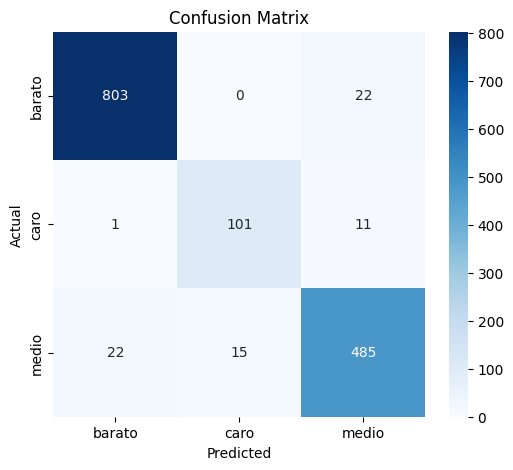

In [182]:
target_pred = cross_val_predict(modelo, data, target, cv = 10)

svm.metrics_and_cm(target, target_pred)

### MODELO 2

In [183]:
from sklearn.model_selection import GridSearchCV

modelo2 = make_pipeline(preprocesador, SVC(kernel="poly"))
_=modelo2.fit(data_train,target_train)
param_grid = {
    'svc__C': (0.01, 0.5, 1, 5,8,15),
    'svc__degree':(2,3,5,7)
    }
model_grid_search = GridSearchCV(modelo2, param_grid=param_grid,
                                 n_jobs=2, cv=10)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
print("Accuracy: ",accuracy)
model_grid_search.best_params_

Accuracy:  0.9155251141552512


{'svc__C': 15, 'svc__degree': 2}

Precisión del modelo: 0.90
              precision    recall  f1-score   support

      barato       0.95      0.93      0.94       844
        caro       0.72      0.90      0.80        93
       medio       0.87      0.86      0.86       523

    accuracy                           0.90      1460
   macro avg       0.85      0.90      0.87      1460
weighted avg       0.90      0.90      0.90      1460



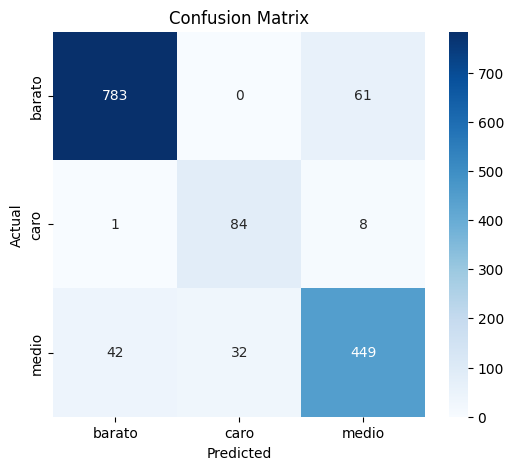

In [184]:
target_pred2 = cross_val_predict(modelo2, data, target, cv = 10)

svm.metrics_and_cm(target, target_pred2)

### Modelo 3

In [185]:
modelo3 = make_pipeline(preprocesador, SVC(kernel="rbf"))
modelo3.fit(data_train,target_train)
param_grid = {
    'svc__C': (0.1, 1, 4, 5,10,20),
    'svc__gamma':(0.000002,0.002,0.01,1,20,100 )
    }
model_grid_search = GridSearchCV(modelo3, param_grid=param_grid,
                                 n_jobs=-1, cv=10)
model_grid_search.fit(data_train, target_train)
accuracy = model_grid_search.score(data_test, target_test)
print("Accuracy: ",accuracy)
model_grid_search.best_params_

Accuracy:  0.910958904109589


{'svc__C': 20, 'svc__gamma': 0.002}

Precisión del modelo: 0.89
              precision    recall  f1-score   support

      barato       0.95      0.92      0.94       851
        caro       0.56      0.92      0.70        71
       medio       0.86      0.83      0.85       538

    accuracy                           0.89      1460
   macro avg       0.79      0.89      0.83      1460
weighted avg       0.90      0.89      0.89      1460



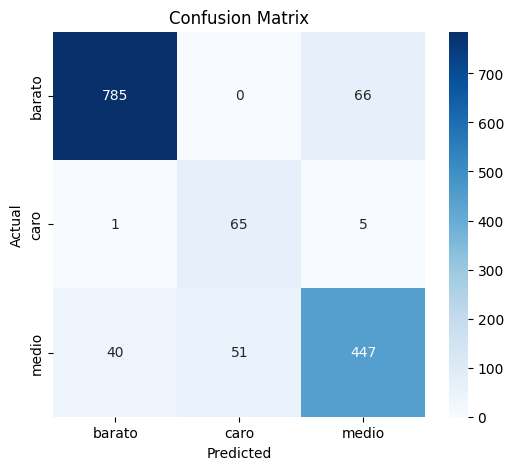

In [186]:
target_pred3 = cross_val_predict(modelo3, data, target, cv = 10)
svm.metrics_and_cm(target, target_pred3)

### Overfittin o Underfitting?
Dado que las metricas de eficiencia obtenidas en los modelos son bastante altas, mayores a 0.89, el riesgo y probabilidad de que haya Underfitting es despreciable. Para evaluar la presencia de overfitting, podemos comparar la eficiencia de los modelos con respecto a la particion de Prueba y de Entrenamiento. Si existe una gran diferencia entre estos valores, valdria la pena generar un modelo basado en validacion cruzada, o algo por el estilo, para evitar sesgos en las predicciones.

In [187]:
## Formal models
svm_linear = make_pipeline(preprocesador, SVC(kernel="linear"))
svm_linear.fit(data_train, target_train)

svm_poly = make_pipeline(preprocesador, SVC(kernel="poly", C=15,degree=2))
svm_poly.fit(data_train, target_train)

svm_gauss = make_pipeline(preprocesador, SVC(kernel="rbf", C=20, gamma=0.002))
svm_gauss.fit(data_train, target_train)


c:\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('numerico',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object'))])),
                ('svc', SVC(C=20, gamma=0.002))])

In [188]:

overfit = pd.DataFrame(columns=["Modelo", "Train","Test"])
overfit_dict = {"Modelo": ["Lineal", "Polinomial", "Gaussiano"], 
      "Train": [
          svm_linear.score(data_train, target_train),
          svm_poly.score(data_train, target_train),
          svm_gauss.score(data_train, target_train)
          ], 
      "Test": [
          svm_linear.score(data_test, target_test),
          svm_poly.score(data_test, target_test),
          svm_gauss.score(data_test, target_test)
      ]
}
overfit = pd.DataFrame(overfit_dict)
print(overfit)


       Modelo     Train      Test
0      Lineal  0.990206  0.965753
1  Polinomial  0.959843  0.915525
2   Gaussiano  0.971596  0.910959


Precisión del modelo: 0.95
              precision    recall  f1-score   support

      barato       0.97      0.97      0.97       826
        caro       0.89      0.87      0.88       116
       medio       0.93      0.94      0.93       518

    accuracy                           0.95      1460
   macro avg       0.93      0.93      0.93      1460
weighted avg       0.95      0.95      0.95      1460



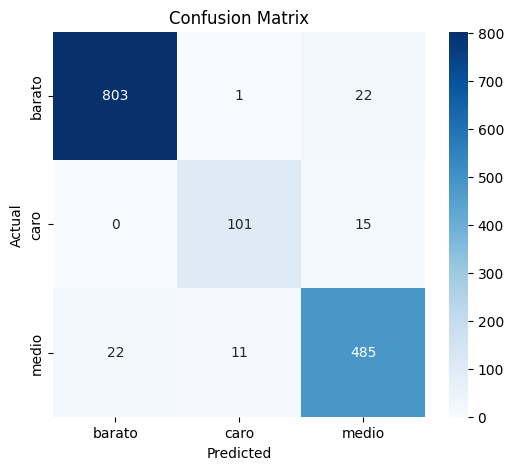

Precisión del modelo: 0.92
              precision    recall  f1-score   support

      barato       0.95      0.95      0.95       826
        caro       0.88      0.85      0.87       116
       medio       0.89      0.89      0.89       518

    accuracy                           0.92      1460
   macro avg       0.91      0.90      0.90      1460
weighted avg       0.92      0.92      0.92      1460



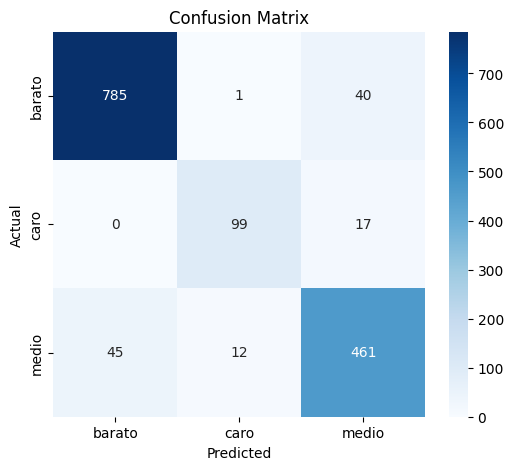

Precisión del modelo: 0.91
              precision    recall  f1-score   support

      barato       0.94      0.94      0.94       826
        caro       0.86      0.84      0.85       116
       medio       0.87      0.87      0.87       518

    accuracy                           0.91      1460
   macro avg       0.89      0.88      0.89      1460
weighted avg       0.91      0.91      0.91      1460



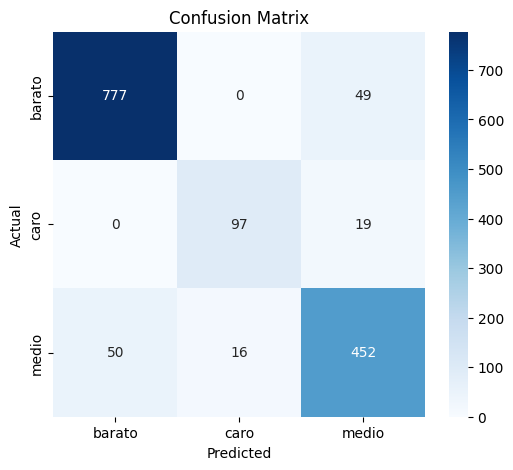

In [189]:
from sklearn.model_selection import cross_validate, cross_val_predict
cv = 10
# CV for linear
svm_linear = make_pipeline(preprocesador, SVC(kernel="linear"))
lin_pred = cross_val_predict(svm_linear, data, target, cv = cv)
svm.metrics_and_cm(lin_pred, target)
# CV for polynomial
svm_poly = make_pipeline(preprocesador, SVC(kernel="poly", C=15,degree=2))
poly_pred = cross_val_predict(svm_poly, data, target, cv = cv)
svm.metrics_and_cm(poly_pred, target)
# CV for gaussian
svm_gauss = make_pipeline(preprocesador, SVC(kernel="rbf", C=20, gamma=0.002))
gauss_pred = cross_val_predict(svm_gauss, data, target, cv = cv)
svm.metrics_and_cm(gauss_pred, target)

## Time and Memory usage

In [190]:
import performance
# # Normal
# for m in [("SVM Linear",svm_linear), ("SVM Polynomial",svm_poly), ("SVM Gauss",svm_gauss)]:
#     performance.time_and_memory(m[1],data_train, target_train, data_test, m[0])


In [191]:
# CV  
for m in [("SVM Linear - CV",svm_linear), ("SVM Polynomial - CV",svm_poly), ("SVM Gauss",svm_gauss)]:
    performance.time_and_memory_cv(m[1],data, target, m[0])

Cross-Validation Predicting SVM Linear - CV: 
- Time: 2.03s
- Peak Memory Usage: 355.6171875 MiB
Cross-Validation Predicting SVM Polynomial - CV: 
- Time: 1.66s
- Peak Memory Usage: 355.6171875 MiB
Cross-Validation Predicting SVM Gauss: 
- Time: 1.54s
- Peak Memory Usage: 355.6171875 MiB


## Comparacion con otros modelos

In [192]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
models = []
# 0. SVM lineal (best)
    # Best: (kernel: 'linear')
svm_model = make_pipeline(preprocesador, SVC(kernel="linear"))
svm_model.fit(data_train, target_train)
ypred_svm = svm_model.predict(data_test)
models.append((
    svm_model, ypred_svm, "SVM Linear"
))

# 1. Naive Bayes
    # Best: {'var_smoothing': 0.0657933224657568}
nb_model = make_pipeline(preprocesador, GaussianNB(var_smoothing=0.065))
nb_model.fit(data_train, target_train)
ypred_nb = nb_model.predict(data_test)
models.append((
    nb_model, ypred_nb, "NB Gaussian"
))
# 2. Arbol de decision
    # best: {depth=4}
dt_model = make_pipeline(preprocesador, 
                        DecisionTreeClassifier(criterion='gini',max_depth=4))
dt_model.fit(data_train, target_train)
ypred_dt = dt_model.predict(data_test)
models.append((
    dt_model, ypred_dt, "Clas. Tree"
))

# 3. Random Forest
    # {No specific parameters}
rf_model = make_pipeline(preprocesador, 
                        RandomForestClassifier(random_state=42))
rf_model.fit(data_train, target_train)
ypred_rf = rf_model.predict(data_test)
models.append((
    rf_model, ypred_rf, "Random Forest"
))
# 4. KNN
# knn_model {n = 9, p = 1, weights = distance}
knn_model = make_pipeline(preprocesador, 
                         KNeighborsClassifier(n_neighbors=9, p=1, weights='distance'))
knn_model.fit(data_train, target_train)
ypred_knn = knn_model.predict(data_test)
models.append((
    knn_model, ypred_knn, "KNN"
))
# 5. Regresion logistica
# Best {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
lr_model = make_pipeline(preprocesador, 
                        LogisticRegression(C=0.01, penalty='l2', solver='newton-cg'))
lr_model.fit(data_train, target_train)
ypred_lr = lr_model.predict(data_test)
models.append((
    lr_model, ypred_lr, "Logistic Regression"
))


### Eficiency:

SVM Linear
Precisión del modelo: 0.97
              precision    recall  f1-score   support

      barato       0.98      0.98      0.98       250
        caro       0.91      0.94      0.92        31
       medio       0.96      0.95      0.95       157

    accuracy                           0.97       438
   macro avg       0.95      0.95      0.95       438
weighted avg       0.97      0.97      0.97       438



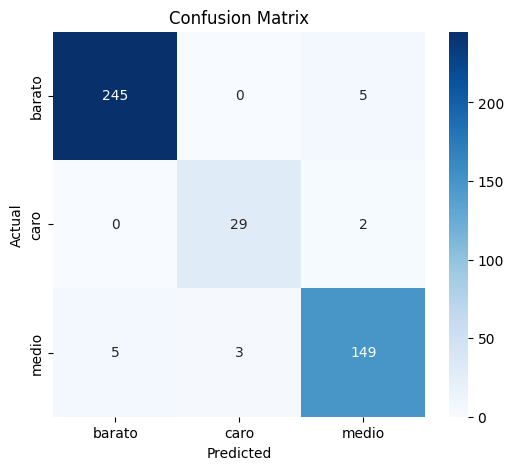

NB Gaussian
Precisión del modelo: 0.83
              precision    recall  f1-score   support

      barato       0.93      0.82      0.87       250
        caro       0.86      0.58      0.69        31
       medio       0.71      0.89      0.79       157

    accuracy                           0.83       438
   macro avg       0.83      0.76      0.78       438
weighted avg       0.85      0.83      0.83       438



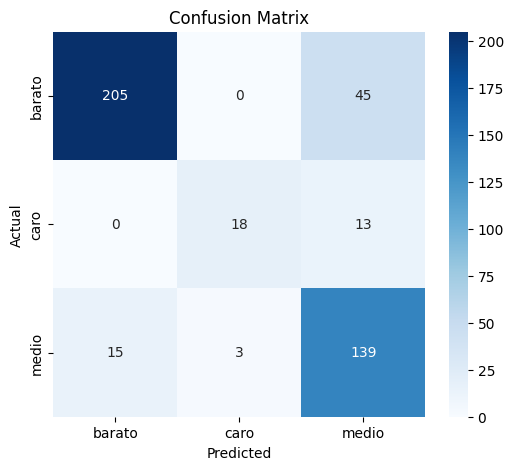

Clas. Tree
Precisión del modelo: 1.00
              precision    recall  f1-score   support

      barato       1.00      1.00      1.00       250
        caro       1.00      1.00      1.00        31
       medio       1.00      1.00      1.00       157

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



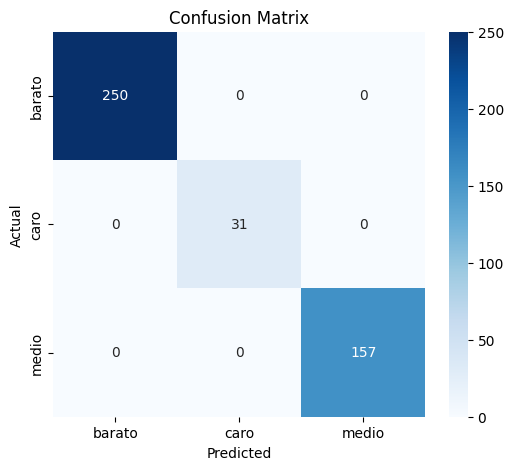

Random Forest
Precisión del modelo: 0.99
              precision    recall  f1-score   support

      barato       1.00      1.00      1.00       250
        caro       1.00      0.90      0.95        31
       medio       0.98      1.00      0.99       157

    accuracy                           0.99       438
   macro avg       0.99      0.97      0.98       438
weighted avg       0.99      0.99      0.99       438



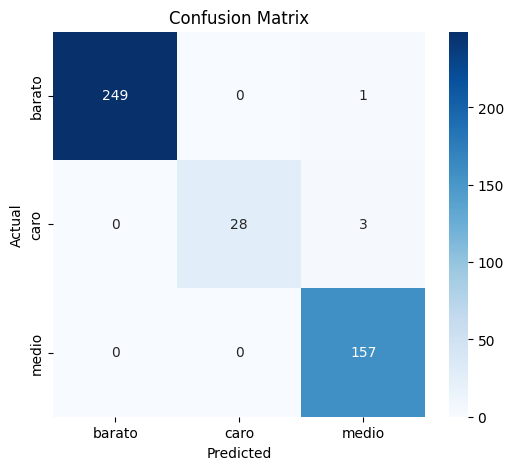

KNN
Precisión del modelo: 0.86
              precision    recall  f1-score   support

      barato       0.89      0.94      0.91       250
        caro       0.85      0.55      0.67        31
       medio       0.82      0.80      0.81       157

    accuracy                           0.86       438
   macro avg       0.85      0.76      0.80       438
weighted avg       0.86      0.86      0.86       438



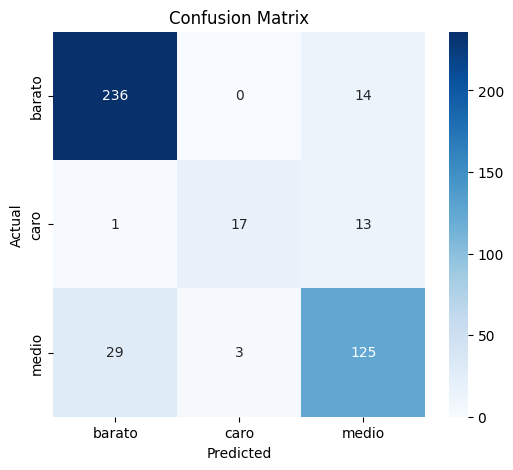

Logistic Regression
Precisión del modelo: 0.88
              precision    recall  f1-score   support

      barato       0.92      0.95      0.93       250
        caro       0.93      0.45      0.61        31
       medio       0.82      0.86      0.84       157

    accuracy                           0.88       438
   macro avg       0.89      0.75      0.79       438
weighted avg       0.88      0.88      0.88       438



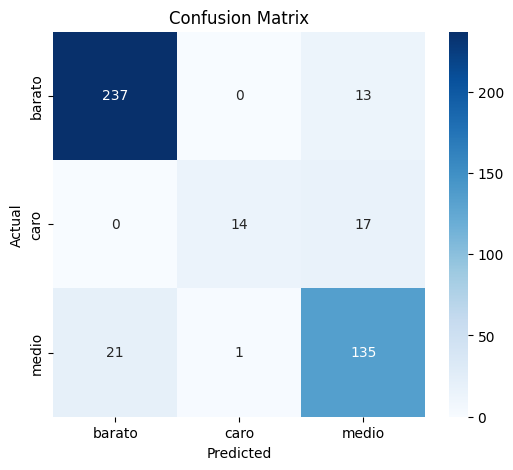

In [193]:
for m in models:
    print(m[2])
    svm.metrics_and_cm(m[1],target_test)

## Resource use

In [194]:
for m in models:
    performance.time_and_memory(m[0],data_train, target_train, data_test, m[2])
    print("\n")

Training SVM Linear: 
- Tiempo: 2.20s
- Memoria Peak: 357.3984375 MiB
Predicting SVM Linear: 
- Tiempo: 4.01s
- Memoria Peak: 357.3984375 MiB


Training NB Gaussian: 
- Tiempo: 3.95s
- Memoria Peak: 357.4375 MiB
Predicting NB Gaussian: 
- Tiempo: 4.10s
- Memoria Peak: 357.4375 MiB


Training Clas. Tree: 
- Tiempo: 3.93s
- Memoria Peak: 357.4375 MiB
Predicting Clas. Tree: 
- Tiempo: 3.84s
- Memoria Peak: 357.4375 MiB


Training Random Forest: 
- Tiempo: 1.23s
- Memoria Peak: 357.44140625 MiB
Predicting Random Forest: 
- Tiempo: 4.11s
- Memoria Peak: 357.453125 MiB


Training KNN: 
- Tiempo: 4.07s
- Memoria Peak: 357.453125 MiB
Predicting KNN: 
- Tiempo: 3.84s
- Memoria Peak: 357.51171875 MiB


Training Logistic Regression: 
- Tiempo: 3.75s
- Memoria Peak: 357.453125 MiB
Predicting Logistic Regression: 
- Tiempo: 4.70s
- Memoria Peak: 357.453125 MiB




## SVM Regression

### New train test split

In [214]:
X = data.copy()
salePrice = X.pop("SalePrice")
# Regression preprocessoor
reg_num_cols = X.select_dtypes(include=['float64', 'int64']).columns.drop('price_group', errors='ignore')
cat_num_cols = X.select_dtypes(include=['object']).columns.drop('price_group', errors='ignore')

# Numerical prepreocessor
num_pp = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)
# Categorical prepreocessor
cat_pp = OneHotEncoder(handle_unknown="ignore")

#Se transforman las colunas usando los preprocesadores
reg_pp = ColumnTransformer([
    ('one_hot_encoder',cat_pp,cat_num_cols),
    ('numerico', num_pp,reg_num_cols)
],remainder="passthrough")

In [216]:

X_train, X_test,y_train, y_test = train_test_split(X, salePrice, test_size=0.3,train_size=0.7, random_state=42)

In [241]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.svm import SVR

# Set the grid of parameters
svm_regressor = make_pipeline(reg_pp, SVR())
param_grid = {
    'svr__kernel': ['linear','poly', 'rbf'],
    'svr__C': [0.01, 0.1, 1, 10, 100],
    'svr__epsilon': [0.1, 0.5, 1.0],
    'svr__degree': [2, 3, 4], 
    'svr__gamma': ['scale', 'auto']
}
gs = GridSearchCV(
    svm_regressor,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gs.fit(X_train, y_train)
best_model_svr= gs.best_estimator_
print("Best Params: ",gs.best_params_)
best_rmse = np.sqrt(-gs.best_score_)
print("Best RMSE", best_rmse)


Best Params:  {'svr__C': 100, 'svr__degree': 3, 'svr__epsilon': 0.1, 'svr__gamma': 'auto', 'svr__kernel': 'poly'}
Best RMSE 36353.72033361697


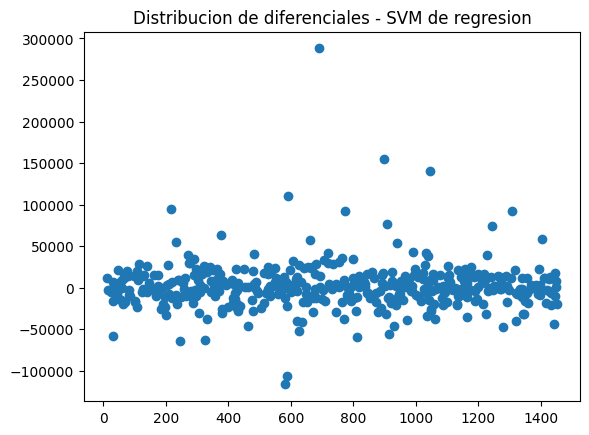

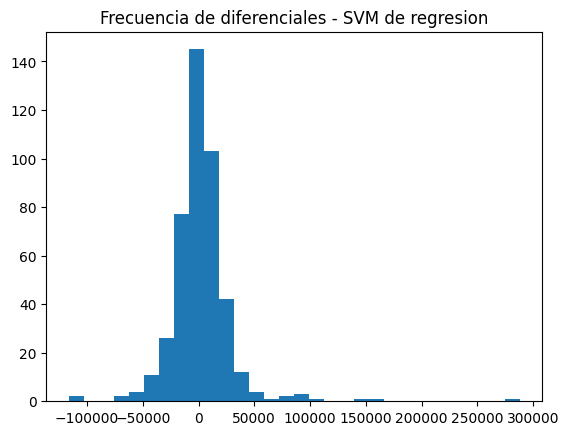

No es normal 8.850805320891854e-102


In [245]:
from scipy import stats
y_pred_best = best_model_svr.predict(X_test)
diff = y_test-y_pred_best
# Diff distributuion
plt.title("Distribucion de diferenciales - SVM de regresion")
plt.plot(diff, 'o')
plt.show()

plt.title("Frecuencia de diferenciales - SVM de regresion")
plt.hist(diff, bins=30)
plt.show()
statistic, p_value = stats.kstest(diff, 'norm')
alpha = 0.05
if p_value > alpha:
    print("Si es normal", p_value)
else:
   print("No es normal", p_value)